In [1]:
# Import des librairies classiques 
import pandas as pd 
import numpy as np

In [ ]:
# Import du fichier 
from google.colab import files
upload = files.upload()

In [3]:
# Lecture du fichier 
dataset = pd.read_csv("./Exercices /Wine_grading.csv", index_col=0)
dataset.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Grade
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
# Gestion des NaN
dataset.isnull().any()

alcohol                         False
malic_acid                      False
ash                             False
alcalinity_of_ash               False
magnesium                       False
total_phenols                   False
flavanoids                      False
nonflavanoid_phenols            False
proanthocyanins                 False
color_intensity                 False
hue                             False
od280/od315_of_diluted_wines    False
proline                         False
Grade                           False
dtype: bool

In [5]:
# Séparation des X & y 
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [6]:
# Voir les catégories de y 
y.unique()

array([0, 1, 2])

In [7]:
y.value_counts()


1    71
0    59
2    48
Name: Grade, dtype: int64

In [8]:
print(71/y.shape[0])

0.398876404494382


In [9]:
# Train_test_split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
dataset.shape

(178, 14)

In [27]:
# Création d'un modèle d'arbres de decisions 
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
# Evaluation du modèle 
print("Train Score : {}".format(classifier.score(X_train, y_train)))
print('Test Score : {}'.format(classifier.score(X_test, y_test)))

Train Score : 0.9929577464788732
Test Score : 0.9722222222222222


In [19]:
classifier.feature_importances_

array([0.04160072, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.43295084, 0.        , 0.        , 0.4163191 ,
       0.10912933, 0.        , 0.        ])

In [20]:
# Feature importance 
feature_importance = pd.DataFrame({"Features":dataset.columns[:-1],
                                    "Value": classifier.feature_importances_})

feature_importance.sort_values(["Value"], ascending=False)

,Features,Value
6,flavanoids,0.432951
9,color_intensity,0.416319
10,hue,0.109129
0,alcohol,0.041601
1,malic_acid,0.000000
2,ash,0.000000
3,alcalinity_of_ash,0.000000
4,magnesium,0.000000
5,total_phenols,0.000000
7,nonflavanoid_phenols,0.000000


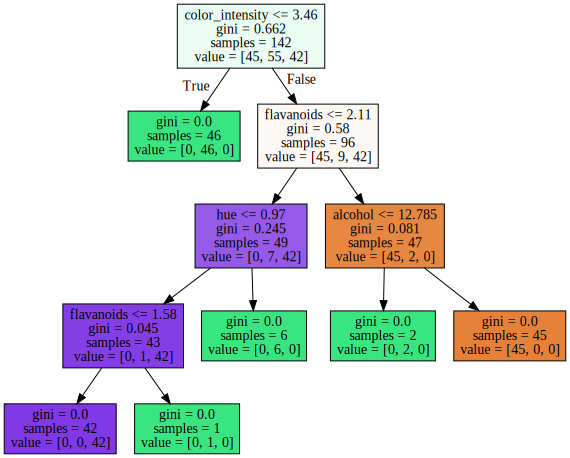

In [28]:
#affichons l'arbre associé
from graphviz import Source
from sklearn import tree

Source(tree.export_graphviz(classifier, out_file=None, feature_names=dataset.columns[:-1], filled = True))

In [24]:
# Matrice de confusion 
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, classifier.predict(X_test))
print(cm)

[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]
